# Лабораторная работа №4


**Цель лабораторной работы:** изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

# Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью трех подходящих для задачи метрик.
5. Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.
6. Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.
7. Повторите пункт 4 для найденного оптимального значения гиперпараметра K. Сравните качество полученной модели с качеством модели, полученной в пункте 4.
8. Постройте кривые обучения и валидации.

# Ход выполнения лабораторной работы

## Выбор датасета


В качестве исходных данных выбираем датасет Heart Disease UCI (https://www.kaggle.com/ronitf/heart-disease-uci). 303 записи, 14 признаков, целевой признак относится к наличию болезни сердца у пациента: 0 - нет болезни сердца, 1 - есть.

In [0]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import files
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
os.listdir()
data = pd.read_csv('drive/My Drive/mmo_datasets/heart.csv',
                   sep=",", encoding="iso-8859-1")

In [0]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0:
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'
              .format(col, dt, temp_null_count, temp_perc))

data_cleared = data

In [0]:
uniquevalues = np.unique(data_cleared['target'].values)
uniquevalues

array([0, 1])

In [0]:
data_cleared.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## train_test_split

In [0]:
target = data_cleared['target']
data_cleared = data_cleared.drop('target', axis=1)

In [0]:
data_cleared.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    data_cleared, 
    target, 
    test_size=0.2, 
    random_state=1
)

In [0]:
X_train.shape, Y_train.shape

((242, 13), (242,))

In [0]:
X_test.shape, Y_test.shape

((61, 13), (61,))

## Обучение для произвольного параметра K

In [0]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [0]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
predicted = knn_model.predict(X_test)
predicted

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predicted)

0.5737704918032787

In [0]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test, predicted)

0.5720430107526882

In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data   
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


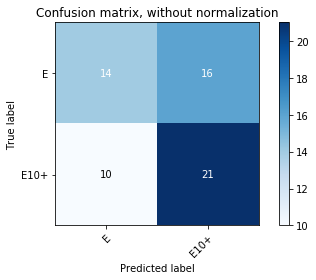

In [0]:
plot_confusion_matrix(Y_test, predicted, 
                      classes=np.array(['E', 'E10+', 'M', 'T']),
                      title='Confusion matrix, without normalization')

In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score
(precision_score(Y_test, predicted, average='weighted'), 
 recall_score(Y_test, predicted, average='weighted'))

(0.5753212228622065, 0.5737704918032787)

In [0]:
f1_score(Y_test, predicted, average='weighted')

0.5688953176899175

## Построение модели и оценка с помощью кросс-валидации

In [0]:
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, cross_validate

scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [0]:
scores1 = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data_cleared,
                         target,
                         scoring=scoring, 
                         cv=KFold(n_splits=3), 
                         return_train_score=True
                        )
scores1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


{'fit_time': array([0.0035882 , 0.00298381, 0.00277495]),
 'score_time': array([0.01822829, 0.01480269, 0.0153482 ]),
 'test_f1': array([0.28813559, 0.55414336, 0.62585034]),
 'test_precision': array([1.        , 0.69316227, 1.        ]),
 'test_recall': array([0.16831683, 0.56435644, 0.45544554]),
 'train_f1': array([0.80387838, 0.79945524, 0.89967881]),
 'train_precision': array([0.86178676, 0.86071429, 0.93169995]),
 'train_recall': array([0.82673267, 0.80693069, 0.89108911])}

In [0]:
scores2 = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data_cleared,
                         target,
                         scoring=scoring, 
                         cv=ShuffleSplit(n_splits=5, test_size=0.25), 
                         return_train_score=True
                        )
scores2

{'fit_time': array([0.00568986, 0.00283527, 0.00285411, 0.00288081, 0.0028367 ]),
 'score_time': array([0.01616049, 0.01285553, 0.01286197, 0.01299715, 0.0131793 ]),
 'test_f1': array([0.59090453, 0.43465982, 0.54309958, 0.49336384, 0.54641813]),
 'test_precision': array([0.65233425, 0.50489204, 0.55322831, 0.58439201, 0.62388664]),
 'test_recall': array([0.59210526, 0.44736842, 0.55263158, 0.52631579, 0.55263158]),
 'train_f1': array([0.77611602, 0.82921815, 0.78953072, 0.80197881, 0.77611602]),
 'train_precision': array([0.85151099, 0.87616921, 0.85960413, 0.86379331, 0.85151099]),
 'train_recall': array([0.78414097, 0.83259912, 0.79295154, 0.8061674 , 0.78414097])}

In [0]:
scores3 = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data_cleared,
                         target,
                         scoring=scoring, 
                         cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2), 
                         return_train_score=True
                        )
scores3

{'fit_time': array([0.00362515, 0.00277042, 0.00277781, 0.00282669, 0.00318956]),
 'score_time': array([0.01695871, 0.01117134, 0.01135397, 0.01128387, 0.01146054]),
 'test_f1': array([0.61222806, 0.60401357, 0.61928718, 0.5710147 , 0.53801583]),
 'test_precision': array([0.66323471, 0.62287796, 0.64371954, 0.58848816, 0.55409836]),
 'test_recall': array([0.62295082, 0.60655738, 0.62295082, 0.57377049, 0.54098361]),
 'train_f1': array([0.81073333, 0.78385644, 0.79288886, 0.77931087, 0.80184646]),
 'train_precision': array([0.86803519, 0.85601355, 0.85991995, 0.85409652, 0.86392588]),
 'train_recall': array([0.81404959, 0.7892562 , 0.79752066, 0.78512397, 0.80578512])}

In [0]:
print("%s, %s, %s" % (np.mean(scores1["test_precision"]),
                      np.mean(scores2["test_precision"]), 
                      np.mean(scores3["test_precision"])))

0.8977207579912921, 0.5837466496118905, 0.6144837452406424


Лучшую точность модели получилось достичь с использованием стратегии кросс-валидации KFold.

## Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [0]:
n_range = np.array(range(2,32,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}]

In [0]:
from sklearn.model_selection import GridSearchCV

clf_gs = GridSearchCV(KNeighborsClassifier(), 
                      tuned_parameters, 
                      cv=ShuffleSplit(n_splits=5, test_size=0.25), 
                      scoring='accuracy')
clf_gs.fit(X_train, Y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.25, train_size=None),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
clf_gs.best_params_

{'n_neighbors': 8}

In [0]:
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

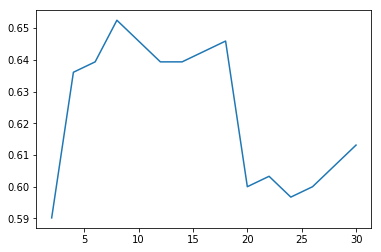

In [0]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

## Сравнение качества обучения моделей

In [0]:
knn_best_model = KNeighborsClassifier(n_neighbors=24)
knn_best_model.fit(X_train, Y_train)
predicted_best = knn_best_model.predict(X_test)
predicted_best

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [0]:
(accuracy_score(Y_test, predicted), 
 accuracy_score(Y_test, predicted_best))

(0.5737704918032787, 0.6557377049180327)

Confusion matrix, without normalization


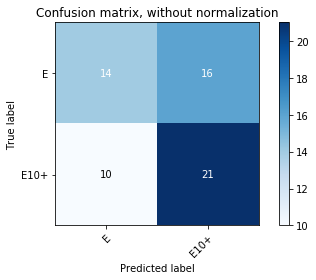

In [0]:
plot_confusion_matrix(Y_test, predicted, 
                      classes=np.array(['E', 'E10+', 'M', 'T']),
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization


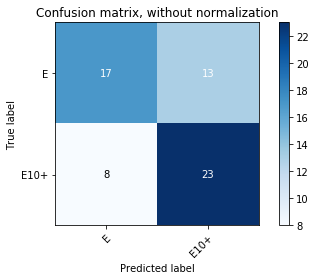

In [0]:
plot_confusion_matrix(Y_test, predicted_best, 
                      classes=np.array(['E', 'E10+', 'M', 'T']),
                      title='Confusion matrix, without normalization')

In [0]:
(precision_score(Y_test, predicted, average='weighted'), 
precision_score(Y_test, predicted_best, average='weighted'))

(0.5753212228622065, 0.6591074681238616)

In [0]:
(recall_score(Y_test, predicted, average='weighted'), 
recall_score(Y_test, predicted_best, average='weighted'))

(0.5737704918032787, 0.6557377049180327)

In [0]:
(f1_score(Y_test, predicted, average='weighted'), 
f1_score(Y_test, predicted_best, average='weighted'))

(0.5688953176899175, 0.65293502680339)

Таким образом, подбор гиперпараметра позволил улучшить результаты оценки модели посредством всех представленных метрик.

## Кривые обучения и валидации

In [0]:
from sklearn.model_selection import learning_curve, validation_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
  
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):                                        
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

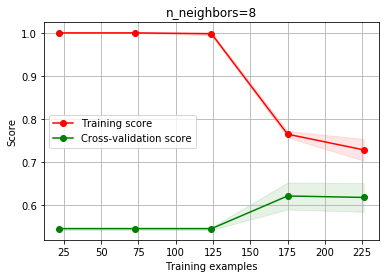

In [0]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=8), 
                    'n_neighbors=8', 
                    data_cleared,
                    target,
                    cv=4
                   )

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

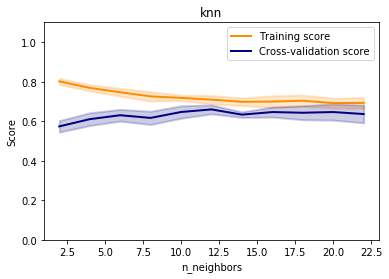

In [0]:
n_range2 = np.array(range(2,24,2))

plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      data_cleared,
                      target, 
                      param_name='n_neighbors', 
                      param_range=n_range2, 
                      cv=4, 
                      scoring="accuracy"
                     )